In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [11]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3  # uniformly distributed between (-3, +3)
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

This implements the function:

$$y = cos(2x_1) + cos(3x_2)$$


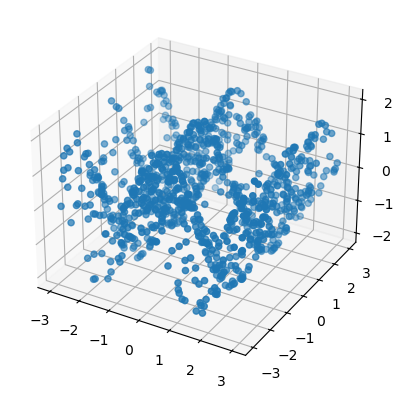

In [12]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

In [13]:
# Build the model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
        tf.keras.layers.Dense(1),
    ]
)

In [14]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
history = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 397us/step - loss: 1.0620
Epoch 2/100
32/32 [==============================] - 0s 399us/step - loss: 0.9748
Epoch 3/100
32/32 [==============================] - 0s 336us/step - loss: 0.9513
Epoch 4/100
32/32 [==============================] - 0s 285us/step - loss: 0.9181
Epoch 5/100
32/32 [==============================] - 0s 278us/step - loss: 0.8842
Epoch 6/100
32/32 [==============================] - 0s 274us/step - loss: 0.8374
Epoch 7/100
32/32 [==============================] - 0s 267us/step - loss: 0.7392
Epoch 8/100
32/32 [==============================] - 0s 230us/step - loss: 0.6976
Epoch 9/100
32/32 [==============================] - 0s 231us/step - loss: 0.6387
Epoch 10/100
32/32 [==============================] - 0s 226us/step - loss: 0.5562
Epoch 11/100
32/32 [==============================] - 0s 236us/step - loss: 0.5828
Epoch 12/100
32/32 [==============================] - 0s 232us/step - loss: 0.5578
Epoch 13/100


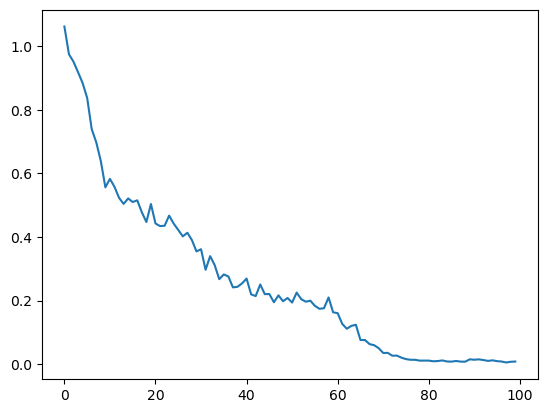

In [15]:
# Plot the loss
plt.plot(history.history['loss'], label='loss')

79/79 [==============================] - 0s 223us/step


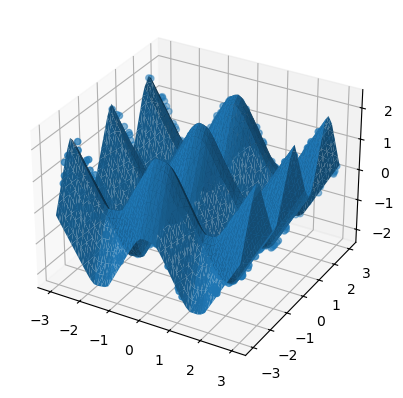

In [18]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)

Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 229us/step


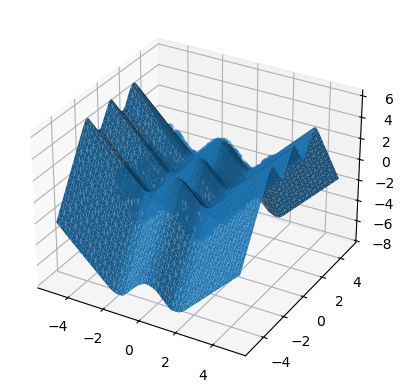

In [19]:
# Can it extrapolate
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# Surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)

Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

Doesn't extrapolate well at all.
